In [1]:
!pip install researchpy
 '''combones pandas, scipy.stats and statsmodels to 
            get more complete information in a single API call'''

In [0]:
#import all the necessary packages
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from matplotlib import style
style.use('ggplot')

import researchpy as rp
from scipy import stats

In [0]:
bike_sharing_data = pd.read_csv('/content/drive/My Drive/hypothesis_exercise_file/02/demos/datasets/bike_sharing_data_processed.csv')

In [8]:
print('Number of rows {}'.format(bike_sharing_data.shape[0]))
print('Number of columns {}'.format(bike_sharing_data.shape[1]))

Number of rows 731
Number of columns 7


In [10]:
#let's check the names of the columns
bike_sharing_data.columns

Index(['season', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'cnt'], dtype='object')

In [9]:
bike_sharing_data.head(5)  #check the head of the dataset

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [11]:
bike_sharing_data['season'].unique() #Unique values in season column

array([1, 2, 3, 4])

In [12]:
bike_sharing_data['holiday'].unique() #Unique values in holiday

array([0, 1])

In [13]:
bike_sharing_data['workingday'].unique() #Unique values in workingday

array([0, 1])

In [14]:
bike_sharing_data['weathersit'].unique() #Unique values in weathersit

array([2, 1, 3])

In [17]:
bike_sharing_data['temp'].describe() #Unique values in temp

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [18]:
'''We want to perfrom T-test to check whether bike renatl on working day 
                     and non-working days are stastically significant or not.'''
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


We can see that the mean on working day is 500 whereas mean on Non-working day is 231. We want to check whether this difference is statstically significant or by chance.

---


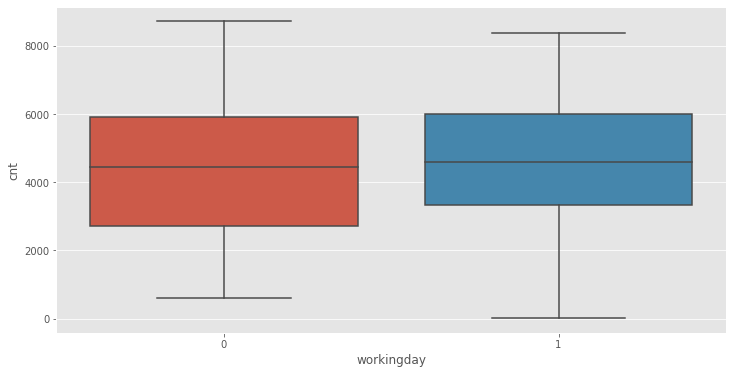

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='workingday',y='cnt',data=bike_sharing_data)
plt.show()

Here we can see that median is almost same for both working and non-working days.

---



In [0]:
#let's create 2 samples 1-for working day and 2- for non-working day
sample_01 = bike_sharing_data[(bike_sharing_data['workingday']==1)]
sample_02 = bike_sharing_data[(bike_sharing_data['workingday']==0)]

In [21]:
#let's check the shape of 2 samples
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [0]:
#Sample_01 1 has 500 records whereas sample_02 has only 231 records
#let's make the records in each samples equal
sample_01 = sample_01.sample(231)

In [32]:
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

### Assumptions of t-test
1.   The variances of the 2 samples are equal(We will Levene's test to check it).
2.   The distrubtion of the residuals b/w the two groups should follow the normall distribution.
We can plot histogram and see whether the distribution follows the normall 
distribution or not.
We can also plot a Q-Q plot.
We can check the normality using shapiro-wilks test as well 


In [0]:
#Levene's test to check whether the variances of the two group are same.
#H0 : Variances are same.
#H1 : Variances are not same.
#Alpha = 0.05%
#if p-value > alpha (Fail to reject H0)
#if p-value < alpha (Accept null hypothesis)

In [33]:
stats.levene(sample_01['cnt'],sample_02['cnt'])

LeveneResult(statistic=3.613152363485726, pvalue=0.057949136455640794)

Here we have got 2 things: 

1.   Test Statistics 
2.   And p-value assosciated with test stastics.


* We can see that p-value(0.0579) > alpha(0.05). So we fail to reject the null hypothesis. Variances of the 2 samples are equal.



In [42]:
#let's write the above code in a better way
alpha = 0.05
statistics,p_value = stats.levene(sample_01['cnt'],sample_02['cnt'])
if p_value > alpha:
  print('Variance is equal\n Accept Null hypothesis\n p-value {}'.format(p_value))
else:
  print('Reject Null Hypothesis, p-value {}'.format(p_value))

Variance is equal
 Accept Null hypothesis
 p-value 0.057949136455640794


### Check for Normality

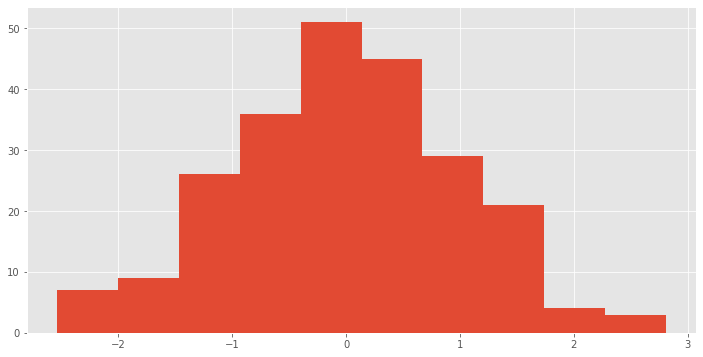

In [48]:
diff = scale(np.array(sample_01['cnt'])-np.array(sample_02['cnt'])) #We are taking the difference b/w samples and scaling it (Standardizing it).
plt.figure(figsize=(12,6))
plt.hist(diff)
plt.show()

The distribution seems normally distributed.

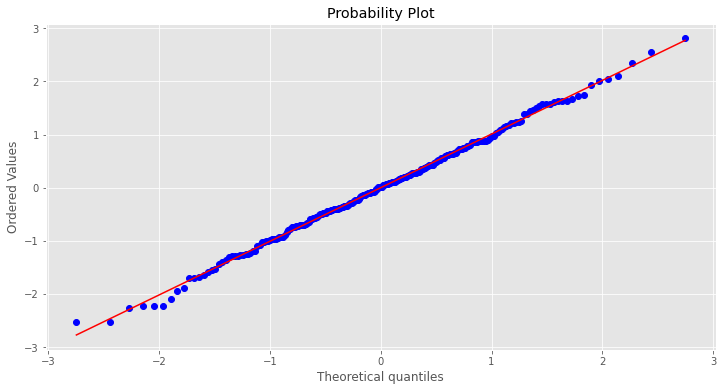

In [50]:
# q-q plot to check the normality
plt.figure(figsize=(12,6))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

We can see that the distribution is almost normaly distributed

In [0]:
#Stastical test for checking normality
#Shapiro-wilk test
#H0 : Normally distributed
#H1 : Not Normally distributed

In [53]:
alpha = 0.05
statistic,p_value = stats.shapiro(diff)
if p_value > alpha:
  print('Accept Null Hypothesis (p-value : {})'.format(p_value))
else:
  print('Reject Null Hypothesis (p-value {})'.format(p_value))

Accept Null Hypothesis (p-value : 0.9509395360946655)


### Independent Sample T-test

In [54]:
stats.ttest_ind(sample_01['cnt'],sample_02['cnt'])

Ttest_indResult(statistic=0.6346691693948295, pvalue=0.5259597289331184)

In [55]:
# H0 : There's no difference in mean (Bike rental doesn't depends on workingday)
# H1 : There's a difference in mean (Bike rental depends on workingday)
# Alpha : 0.05%
alpha = 0.05
statistic , p_value = stats.ttest_ind(sample_01['cnt'],sample_02['cnt'])
if p_value > alpha:
  print('Fail to reject Null Hypothesis')
else:
  print('Reject Null Hypothesis')

Fail to reject Null Hypothesis


In [0]:
#Now lets use researchpy library and see it's usefullness.

In [0]:
descriptives, results = rp.ttest(sample_01['cnt'],sample_02['cnt'])

In [63]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4445.831169,1860.264512,122.396419,4204.669616,4686.992722
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4388.000000,1957.285026,91.061141,4209.053639,4566.946361


In [64]:
results

,Independent t-test,results
0,Difference (cnt - cnt) =,115.6623
1,Degrees of freedom =,460.0000
2,t =,0.6347
3,Two side test p value =,0.5260
4,Difference < 0 p value =,0.7370
5,Difference > 0 p value =,0.2630
6,Cohen's d =,0.0591
7,Hedge's g =,0.0590
8,Glass's delta =,0.0622
9,r =,0.0296


CONCLUSION : Number of bikes rented is not significantly dependent on whether it is a working day or a non-working day.